In [1]:
from preprocessing import pregame #my own functions

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("survey.csv")

### creating object

In [4]:
mh_preprocessing = pregame(df)

### Initial checks

Base following data manipulation on the these outcomes

In [5]:
mh_preprocessing.checks()

INFO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  w

### Foreplay function for filling values

In [6]:
df["self_employed"].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [7]:
fill_self_employed = mh_preprocessing.foreplay("self_employed","No")

In [8]:
df.self_employed.isnull().sum()

0

In [9]:
df["state"].value_counts()

state
CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: count, dtype: int64

In [10]:
df[df["state"].isnull()]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,No,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,No,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
11,2014-08-27 11:32:49,29,male,Bulgaria,NaN,No,No,No,Never,100-500,...,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,2015-05-05 15:16:25,32,female,United Kingdom,NaN,No,No,No,NaN,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,No,Yes,No,No,NaN
1245,2015-05-06 10:14:50,22,Male,Australia,NaN,No,Yes,Yes,Often,100-500,...,Don't know,Maybe,Maybe,No,Yes,No,Maybe,Don't know,Yes,In australia all organisations of a certain si...
1247,2015-05-07 10:08:50,36,male,Finland,NaN,No,No,Yes,Often,6-25,...,Very difficult,Yes,No,Some of them,No,No,Maybe,Don't know,Yes,NaN
1251,2015-08-17 09:38:35,36,Male,South Africa,NaN,No,Yes,Yes,Often,100-500,...,Somewhat easy,No,No,Some of them,Yes,No,Yes,Yes,No,NaN


In [11]:
df.loc[df['Country'] != 'United States', 'state'] = df.loc[df['Country'] != 'United States', 'state'].fillna('notUS')


In [12]:
fill_state = mh_preprocessing.foreplay("state", "unknown")
fill_state

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,notUS,No,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,notUS,No,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,notUS,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [13]:
df["state"].value_counts()

state
notUS      504
CA         138
WA          70
NY          57
TN          45
TX          44
OH          30
IL          29
PA          29
OR          29
IN          27
MI          22
MN          21
MA          20
FL          15
NC          14
VA          14
GA          12
MO          12
WI          12
UT          11
unknown     11
CO           9
MD           8
AL           8
AZ           7
NJ           6
OK           6
SC           5
KY           5
IA           4
DC           4
CT           4
NV           3
NH           3
KS           3
VT           3
SD           3
WY           2
NM           2
NE           2
WV           1
ID           1
MS           1
RI           1
LA           1
ME           1
Name: count, dtype: int64

In [14]:
df.Gender.value_counts()

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

In [15]:
#individual!
df['Gender'] = df['Gender'].replace(['male', 'Male', 'M', 'm', 'Male-ish', 'maile', 'something kinda male?',
                                                                     'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Guy (-ish) ^_^',
                                                                     'male leaning androgynous', 'Male ', 'Man', 'msle', 'Mail', 'cis male',
                                                                     'Malr', 'Cis Man'], 'Male')

df['Gender'] = df['Gender'].replace(['Female', 'female', 'Cis Female', 'F', 'Woman', 'f', 'Femake',
                                                                      'woman', 'Female ', 'cis-female/femme', 'Female (cis)', 'femail'
                                                                      ], 'Female')

df['Gender'] = df['Gender'].replace(['Trans-female', 'queer/she/they', 'non-binary', 'All', 'Enby', 'fluid',
                                                                     'Genderqueer', 'Androgyne', 'Agender', 'Trans woman', 'Neuter', 'Female (trans)',
                                                                      'queer', 'ostensibly male, unsure what that really means'], 'Other')

df['Gender'] = df['Gender'].replace(['Nah', 'A little about you', 'p'], 'No answer')

In [16]:
df = df[df['Gender'] != 'No answer']

In [17]:
df["work_interfere"].value_counts()

work_interfere
Sometimes    464
Never        213
Rarely       173
Often        142
Name: count, dtype: int64

In [18]:
fill_work_interfere = mh_preprocessing.foreplay("work_interfere", "Unknown")

In [19]:
df["work_interfere"].value_counts()

work_interfere
Sometimes    464
Never        213
Rarely       173
Often        142
Name: count, dtype: int64

In [20]:
fill_comments = mh_preprocessing.foreplay("comments", "no comment")

In [21]:
fill_self_employed = mh_preprocessing.foreplay("self_employed","No")

In [22]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                   0
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1094
dtype: int64

No missing values left

In [23]:
drop_col_list = ["Timestamp", "comments"]
df = mh_preprocessing.micdrop(drop_col_list)

In [24]:
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,notUS,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,notUS,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,notUS,No,No,Yes,Unknown,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,NC,No,No,No,Unknown,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [26]:
df = mh_preprocessing.check_outliers()

numeric columns:        Age
0      37
1      44
2      32
3      31
4      31
...   ...
1254   26
1255   32
1256   34
1257   46
1258   25

[1259 rows x 1 columns]


In [27]:
binary = mh_preprocessing.binary_exchange()

/Users/taliarosenkranz/Documents/Developers_Institute/DI_bootcamp_github/Week_4/Day_5/preprocessing.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column].replace({'Yes': 1, 'No': 0}, inplace = True)


In [28]:
pd.set_option('display.max_columns', None)

In [29]:
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,0,0,1,Often,6-25,0,1,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,0
1,44,Male,United States,IN,0,0,0,Rarely,More than 1000,0,0,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,0
2,32,Male,Canada,notUS,0,0,0,Rarely,6-25,0,1,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,0
3,31,Male,United Kingdom,notUS,0,1,1,Often,26-100,0,1,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,1
4,31,Male,United States,TX,0,0,0,Never,100-500,1,1,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,notUS,0,0,1,Unknown,26-100,0,1,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,0
1255,32,Male,United States,IL,0,1,1,Often,26-100,1,1,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,0
1256,34,Male,United States,CA,0,1,1,Sometimes,More than 1000,0,1,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,0
1257,46,Female,United States,NC,0,0,0,Unknown,100-500,1,1,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,0


In [30]:
ordinal_column_list = ["work_interfere", "no_employees", "leave"]
ordinal = mh_preprocessing.ordinal_exchange(ordinal_column_list)

/Users/taliarosenkranz/Documents/Developers_Institute/DI_bootcamp_github/Week_4/Day_5/preprocessing.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column] = encoded_data
/Users/taliarosenkranz/Documents/Developers_Institute/DI_bootcamp_github/Week_4/Day_5/preprocessing.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column] = encoded_data
/Users/taliarosenkranz/Documents/Developers_Institute/DI_bootcamp_github/Week_4/Day_5/preprocessing.py:80: SettingWithCopyWarning: 
A value is t

In [31]:
df = mh_preprocessing.smartie()

/Users/taliarosenkranz/Documents/Developers_Institute/DI_bootcamp_github/Week_4/Day_5/preprocessing.py:84: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  nominal_column_list = [col for col in self.df.columns if 'Yes' in self.df[col].values]


In [32]:
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,leave,obs_consequence,benefits_Don't know,benefits_No,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,seek_help_Don't know,seek_help_No,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Some of them,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes
0,37,Female,United States,IL,0,0,1,0.0,0.0,0,1,0.0,0,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,True
1,44,Male,United States,IN,0,0,0,1.0,1.0,0,0,1.0,0,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False
2,32,Male,Canada,notUS,0,0,0,1.0,0.0,0,1,2.0,0,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False
3,31,Male,United Kingdom,notUS,0,1,1,0.0,2.0,0,1,2.0,1,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
4,31,Male,United States,TX,0,0,0,2.0,3.0,1,1,1.0,0,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,notUS,0,0,1,4.0,2.0,0,1,0.0,0,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False
1255,32,Male,United States,IL,0,1,1,0.0,2.0,1,1,2.0,0,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True
1256,34,Male,United States,CA,0,1,1,3.0,1.0,0,1,2.0,0,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False
1257,46,Female,United States,NC,0,0,0,4.0,3.0,1,1,1.0,0,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False


In [33]:
df["age_group"] = pd.cut(df.Age, bins = 3)

In [34]:
df.Age.min()

18

In [35]:
#NOTHING TO SCALE IN THIS DF
#mh_preprocessing.toScaleOrNotToScale()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219 entries, 0 to 1258
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Age                              1219 non-null   int64   
 1   Gender                           1219 non-null   object  
 2   Country                          1219 non-null   object  
 3   state                            1219 non-null   object  
 4   self_employed                    1219 non-null   int64   
 5   family_history                   1219 non-null   int64   
 6   treatment                        1219 non-null   int64   
 7   work_interfere                   1219 non-null   float64 
 8   no_employees                     1219 non-null   float64 
 9   remote_work                      1219 non-null   int64   
 10  tech_company                     1219 non-null   int64   
 11  leave                            1219 non-null   float64 
 12  obs_consequ

### Analysis

In [54]:
num_cols = df.select_dtypes(include=['int', 'float', 'bool']).columns.tolist()
corr = df[num_cols].corr()
corr

,Age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,leave,obs_consequence,benefits_Don't know,benefits_No,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,seek_help_Don't know,seek_help_No,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Some of them,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes
Age,1.000000,0.054902,0.036569,0.071237,-0.025315,0.073166,0.119539,-0.068382,0.006272,0.057377,-0.120912,-0.042516,0.157260,-0.060946,-0.058080,0.115800,-0.057655,-0.055204,0.121092,-0.046036,-0.081009,0.155841,-0.036176,-0.029243,0.051857,0.012840,-0.069917,0.066164,0.048268,-0.074376,0.060882,0.001740,-0.009611,0.010376,-0.001411,0.009839,-0.007686,-0.074421,0.067597,0.004259,-0.018819,0.054471,-0.046990,-0.012576,0.041147,-0.027062
self_employed,0.054902,1.000000,0.009258,0.020922,-0.056448,0.246090,0.310683,0.077860,0.111334,0.065239,-0.090182,0.274095,-0.171221,-0.022744,-0.036128,0.056402,-0.015035,0.012188,-0.000974,-0.093313,0.110482,-0.032621,-0.113488,0.071119,0.083899,-0.062443,0.083775,-0.024914,-0.005068,-0.011283,0.033275,-0.049121,-0.018248,0.074953,-0.028690,-0.006370,0.032898,0.053637,-0.067672,0.039822,0.043727,-0.045378,0.001299,-0.092809,-0.050883,0.154834
family_history,0.036569,0.009258,1.000000,0.378407,-0.142922,0.075920,0.021134,-0.051392,0.005381,0.116796,-0.080265,-0.080225,0.153456,-0.069653,-0.062400,0.128715,-0.044465,-0.009158,0.052472,-0.017316,-0.033534,0.062505,-0.072166,0.046559,0.052705,0.024602,-0.088309,0.073882,0.030352,-0.049421,0.043793,0.011441,-0.014241,0.006033,0.003832,-0.002750,-0.001093,-0.061871,0.076258,-0.041858,-0.049617,0.056329,-0.007904,-0.076768,0.092052,-0.006068
treatment,0.071237,0.020922,0.378407,1.000000,-0.332642,0.057106,0.026034,-0.032725,0.063008,0.147080,-0.185226,-0.029935,0.207703,-0.149949,-0.134689,0.277422,-0.060762,-0.010585,0.069340,-0.055324,-0.012574,0.079721,-0.147626,0.031627,0.138589,0.034708,-0.115306,0.093483,0.020188,-0.031156,0.025565,-0.054611,0.002432,0.054468,0.026911,0.013598,-0.037844,-0.091545,0.079879,0.012643,-0.041262,0.019178,0.030189,-0.103937,0.104321,0.012093
work_interfere,-0.025315,-0.056448,-0.142922,-0.332642,1.000000,-0.006759,-0.033974,0.043052,-0.010879,-0.094679,0.114291,-0.026525,-0.085709,0.061492,0.057968,-0.116261,0.064555,-0.019479,-0.036048,0.066285,-0.026210,-0.043147,0.041832,-0.070737,-0.009388,0.010821,0.062351,-0.084734,0.019491,-0.002490,-0.032644,-0.004562,0.038271,-0.043810,-0.000827,-0.011462,0.011284,0.006079,-0.012325,0.015049,-0.007093,0.018182,-0.014589,0.029433,-0.041129,0.008162
no_employees,0.073166,0.246090,0.075920,0.057106,-0.006759,1.000000,0.144232,-0.025926,0.067378,0.039214,-0.031151,0.033641,-0.001557,-0.086101,0.019528,0.070915,0.032488,-0.038298,0.016750,0.000725,0.006981,-0.009693,-0.040354,-0.003203,0.043615,0.010080,-0.007993,-0.002386,-0.013351,-0.012452,0.051776,-0.024109,0.013789,0.007894,0.004299,0.012338,-0.015362,-0.025025,0.010862,0.028294,-0.045456,0.053629,-0.009930,-0.041133,0.012479,0.033591
remote_work,0.119539,0.310683,0.021134,0.026034,-0.033974,0.144232,1.000000,0.136131,0.090644,-0.053706,0.017179,0.075887,-0.088240,0.004076,-0.024590,0.018235,0.048758,0.021366,-0.071403,0.009913,0.033568,-0.054015,0.006261,-0.010160,-0.001611,-0.063068,0.040931,0.025442,0.011960,-0.013205,0.004231,-0.054308,-0.015092,0.076411,-0.007970,-0.034625,0.039249,0.070554,-0.082701,0.038091,0.039751,-0.047583,0.0095

In [56]:
df_numeric = binary_exchange()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,leave,obs_consequence,benefits_Don't know,benefits_No,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,seek_help_Don't know,seek_help_No,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Some of them,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,age_group
0,37,Female,United States,IL,0,0,1,0.0,0.0,0,1,0.0,0,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,True,"(28.333, 38.667]"
1,44,Male,United States,IN,0,0,0,1.0,1.0,0,0,1.0,0,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,"(38.667, 49.0]"
2,32,Male,Canada,notUS,0,0,0,1.0,0.0,0,1,2.0,0,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,"(28.333, 38.667]"
3,31,Male,United Kingdom,notUS,0,1,1,0.0,2.0,0,1,2.0,1,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,"(28.333, 38.667]"
4,31,Male,United States,TX,0,0,0,2.0,3.0,1,1,1.0,0,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,False,"(28.333, 38.667]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,notUS,0,0,1,4.0,2.0,0,1,0.0,0,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,"(17.969, 28.333]"
1255,32,Male,United States,IL,0,1,1,0.0,2.0,1,1,2.0,0,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,"(28.333, 38.667]"
1256,34,Male,United States,CA,0,1,1,3.0,1.0,0,1,2.0,0,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,"(28.333, 38.667]"
1257,46,Female,United States,NC,0,0,0,4.0,3.0,1,1,1.0,0,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,"(38.667, 49.0]"


In [55]:
corelation = df_filtered.corr()
plt.figure(figsize = (18,10))
sns.heatmap(corelation, annot=True)

ValueError: could not convert string to float: 'Male'

1. What is the distribution of mental health conditions among different age groups in the tech industry?

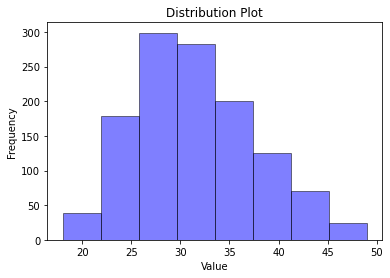

In [39]:
plt.hist(df.Age, bins=8, alpha=0.5, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Showing the plot
plt.show()

How does the frequency of mental health issues vary by gender?

In [40]:
df.groupby("Gender")["treatment"].value_counts()

Gender     treatment
Female     1            169
           0             76
Male       0            527
           1            432
No answer  1              1
Other      1             12
           0              2
Name: count, dtype: int64

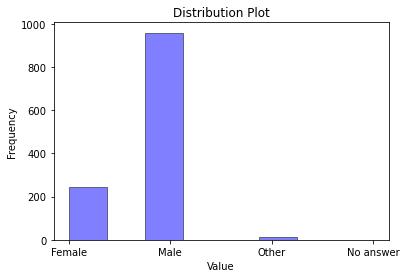

In [41]:
plt.hist(df.Gender, bins=8, alpha=0.5, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Showing the bplot
plt.show()

Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.

In [47]:
grouped = df.groupby("Country")["treatment"].value_counts()
grouped

Country         treatment
Australia       1             13
                0              8
Austria         0              3
Belgium         0              5
                1              1
                            ... 
United Kingdom  0             92
                1             89
United States   1            396
                0            325
Uruguay         0              1
Name: count, Length: 67, dtype: int64

In [49]:
# Identify countries with any 'treatment' == 1
countries_to_exclude = grouped[grouped.index.get_level_values('treatment') == 1].index.get_level_values('Country').unique()
df_filtered = df[~df["Country"].isin(countries_to_exclude)]


In [50]:
df_filtered

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,leave,obs_consequence,benefits_Don't know,benefits_No,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,seek_help_Don't know,seek_help_No,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Some of them,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,age_group
37,38,Male,Portugal,notUS,0,0,0,4.0,3.0,0,1,0.0,0,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,"(28.333, 38.667]"
93,18,Male,Russia,notUS,0,0,0,4.0,2.0,1,1,0.0,0,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,"(17.969, 28.333]"
133,38,Male,Costa Rica,notUS,0,0,0,4.0,2.0,1,1,0.0,0,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,True,False,True,False,"(28.333, 38.667]"
139,22,Male,Austria,notUS,0,0,0,4.0,0.0,1,1,0.0,0,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,"(17.969, 28.333]"
192,28,Male,Russia,notUS,0,0,0,3.0,2.0,0,1,1.0,0,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,"(17.969, 28.333]"
204,34,Male,Austria,notUS,0,1,0,4.0,3.0,1,1,4.0,0,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,"(28.333, 38.667]"
277,28,Male,Colombia,notUS,0,0,0,3.0,0.0,0,1,0.0,0,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False,"(17.969, 28.333]"
281,27,Male,Portugal,notUS,0,0,0,2.0,0.0,0,1,1.0,0,False,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,"(17.969, 28.333]"
319,29,Male,Latvia,NY,0,0,0,4.0,2.0,0,1,0.0,0,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,"(28.333, 38.667]"
334,29,Male,Romania,notUS,0,0,0,4.0,0.0,1,0,1.0,0,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,"(28.333, 38.667]"


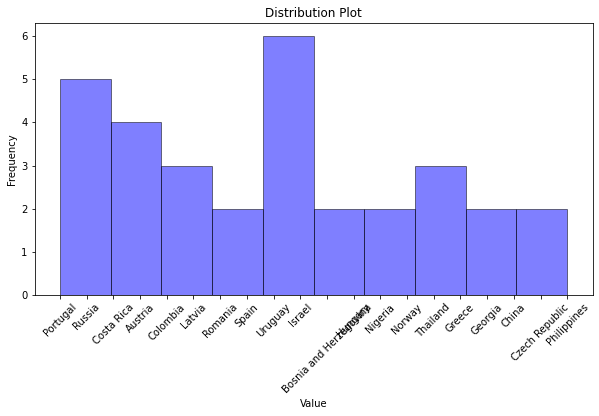

In [52]:
#min 20 answered
#min value and only those that take trestment

plt.figure(figsize=(10, 5))
plt.hist(df_filtered.Country, bins=10, alpha=0.5, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Showing the bplot
plt.show()

In [53]:
df_filtered.groupby("age_group")["treatment"].value_counts()

age_group         treatment
(17.969, 28.333]  0            18
(28.333, 38.667]  0            10
(38.667, 49.0]    0             3
Name: count, dtype: int64